In [1]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()
   
    labels_id =[]
    labels_class =[]
    for each in list_labels:
        labels_id.append(each[0])
        labels_class.append(each[1])
        
    series_labels = pd.DataFrame(labels_class, index=labels_id)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['label']
print df_labels.head()
print df_labels.tail()

                label
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
            label
60739  functional
27263  functional
37057  functional
31282  functional
26348  functional


In [2]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    list_pumps_id = []
    list_pumps_fields = []
    for each in list_pumps:
        list_pumps_id.append(each[0])
        list_pumps_fields.append(each)

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps_fields, index=list_pumps_id)

    return df_pumps

df_data = load_wells()

print df_data.head()
print df_data.tail()

          0     1           2             3     4             5          6   \
69572  69572  6000  2011-03-14         Roman  1390         Roman  34.938093   
8776    8776     0  2013-03-06       Grumeti  1399       GRUMETI  34.698766   
34310  34310    25  2013-02-25  Lottery Club   686  World vision  37.460664   
67743  67743     0  2013-01-28        Unicef   263        UNICEF  38.486161   
19728  19728     0  2011-07-13   Action In A     0       Artisan  31.130847   

              7                     8  9          ...                  30  \
69572  -9.856322                  none  0         ...            annually   
8776   -2.147466              Zahanati  0         ...           never pay   
34310  -3.821329           Kwa Mahundi  0         ...          per bucket   
67743 -11.155298  Zahanati Ya Nanyumbu  0         ...           never pay   
19728  -1.825359               Shuleni  0         ...           never pay   

         31    32            33            34                 

In [3]:
df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [4]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [5]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()
print df_data.shape
print df_labels.shape

df_complete = pd.concat([df_data,df_labels],axis=1)

print df_complete.shape
print df_complete.columns.values



          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [6]:
df_complete.to_csv('/Users/martinrasumoff/map.csv', sep=',', index=False)

In [7]:
df_data_basin = pd.get_dummies(df_data['basin'])
print 'basin:',df_data_basin.shape
df_data_public_meeting = pd.get_dummies(df_data['public_meeting'])
print 'Public Meeting:',df_data_public_meeting.shape
df_data_scheme_mgmnt = pd.get_dummies(df_data['scheme_management'])
print 'Scheme Management:',df_data_scheme_mgmnt.shape
df_data_permit = pd.get_dummies(df_data['permit'])
print 'permit:',df_data_permit.shape
df_data_extraction_type_group = pd.get_dummies(df_data['extraction_type_group'])
print 'Data Extraction:',df_data_extraction_type_group.shape
df_data_extraction_type_class = pd.get_dummies(df_data['extraction_type_class'])
print 'Data Extr Type:',df_data_extraction_type_class.shape
df_data_management_group = pd.get_dummies(df_data['management_group'])
print 'Management Group:',df_data_management_group.shape
df_data_payment_type = pd.get_dummies(df_data['payment_type'])
print 'Payment Type:',df_data_payment_type.shape
df_data_quality_group = pd.get_dummies(df_data['quality_group'])
print 'Quality Group:',df_data_quality_group.shape
df_data_quantity_group = pd.get_dummies(df_data['quantity_group'])
print 'Quantity Group:',df_data_quantity_group.shape
df_data_source_type = pd.get_dummies(df_data['source_type'])
print 'Source Type:',df_data_source_type.shape
df_data_source_class = pd.get_dummies(df_data['source_class'])
print 'Source Class:',df_data_source_class.shape
df_data_waterpoint_type_group = pd.get_dummies(df_data['waterpoint_type_group'])
print 'Waterpoint Type:',df_data_waterpoint_type_group.shape

basin: (59400, 9)
Public Meeting: (59400, 2)
Scheme Management: (59400, 12)
permit: (59400, 2)
Data Extraction: (59400, 13)
Data Extr Type: (59400, 7)
Management Group: (59400, 5)
Payment Type: (59400, 7)
Quality Group: (59400, 6)
Quantity Group: (59400, 5)
Source Type: (59400, 7)
Source Class: (59400, 3)
Waterpoint Type: (59400, 6)


In [8]:
df_data = df_data[['amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

df_coded = pd.concat([df_data,df_data_basin,df_data_public_meeting,df_data_scheme_mgmnt,df_data_permit,\
                      df_data_extraction_type_group,df_data_extraction_type_class,df_data_management_group,\
                      df_data_payment_type,df_data_quality_group,df_data_quantity_group,\
                      df_data_source_type,df_data_source_class,df_data_waterpoint_type_group],axis=1)

print df_data.shape
print df_coded.shape


(59400, 7)
(59400, 91)


In [9]:
df_coded.sort_index(inplace=True)
df_labels.sort_index(inplace=True)

print (df_labels.index == df_coded.index).sum()
print df_coded.shape

print len(df_labels)
print len(df_coded)

59400
(59400, 91)
59400
59400


In [10]:
print df_coded.tail()
print df_labels.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
74240           0        1183  37.007726  -3.280868            2   
74242           0           0  33.724987  -8.940758           12   
74243           0        1188  33.963539  -1.429477           20   
74246          50        1428  35.630481  -7.710549           11   
74247          50         965  35.432998 -10.639270           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
74240              7         350         0           0           0  ...     
74242              2           0         0           0           0  ...     
74243              6          95         0           0           0  ...     
74246              1           1         0           0           0  ...     
74247              2         900         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
74240       0            0        1        0              0   
74

In [11]:
print (df_labels.index == df_coded.index).sum()
print df_coded.shape



59400
(59400, 91)


In [12]:
print df_coded.head()
print df_labels.head()

   amount_tsh  gps_height  longitude  latitude  region_code  district_code  \
0           0           0  33.125828 -5.118154           14              3   
1           0        1978  34.770717 -9.395642           11              4   
2           0           0  36.115056 -6.279268            1              4   
3          10        1639  37.147432 -3.187555            3              5   
4           0           0  36.164893 -6.099289            1              4   

   population  Internal  Lake Nyasa  Lake Rukwa  ...    spring  groundwater  \
0           0         0           0           0  ...         0            1   
1          20         0           0           0  ...         0            1   
2           0         0           0           0  ...         0            1   
3          25         0           0           0  ...         1            1   
4           0         0           0           0  ...         0            1   

   surface  unknown  cattle trough  communal standpipe  

In [13]:
%matplotlib inline

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

print df_coded.shape
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=43)

X = X_pumps_train
y = y_pumps_train[['label']]

print X.shape
print y.shape

print X.head()
print y.head()



(59400, 91)
(44550, 91)
(44550, 1)
       amount_tsh  gps_height  longitude   latitude  region_code  \
37900           0           0  33.104711  -4.053327           14   
40527           0           0  32.569985  -8.954532           12   
26058           0        1804  31.736616  -8.439998           15   
6969          500        1821  34.774402  -9.123071           11   
41018         500         767  36.092962 -10.923966           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
37900              1           0         1           0           0  ...     
40527              6           0         0           0           1  ...     
26058              2         200         0           0           1  ...     
6969               4         108         0           0           0  ...     
41018              5         400         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
37900       0            1    

In [162]:
'''max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features. Note: this parameter is tree-specific.
max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Ignored if max_leaf_nodes is not None. Note: this parameter is tree-specific.
min_samples_split : integer, optional (default=2)
The minimum number of samples required to split an internal node. Note: this parameter is tree-specific.
min_samples_leaf : integer, optional (default=1)
The minimum number of samples in newly created leaves. A split is discarded if after the split, one of the leaves would contain less then min_samples_leaf samples. Note: this parameter is tree-specific.
min_weight_fraction_leaf : float, optional (default=0.)
The minimum weighted fraction of the input samples required to be at a leaf node. Note: this parameter is tree-specific.
max_leaf_nodes : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. If not None then max_depth will be ignored. Note: this parameter is tree-specific.
'''

'max_features : int, float, string or None, optional (default=\xe2\x80\x9dauto\xe2\x80\x9d)\nThe number of features to consider when looking for the best split:\nIf int, then consider max_features features at each split.\nIf float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.\nIf \xe2\x80\x9cauto\xe2\x80\x9d, then max_features=sqrt(n_features).\nIf \xe2\x80\x9csqrt\xe2\x80\x9d, then max_features=sqrt(n_features).\nIf \xe2\x80\x9clog2\xe2\x80\x9d, then max_features=log2(n_features).\nIf None, then max_features=n_features.\nNote: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features. Note: this parameter is tree-specific.\nmax_depth : integer or None, optional (default=None)\nThe maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

'''
n_estimators increase start with 20, default is 10

'''
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=43)


l_labels = ['functional' 'non functional' 'functional needs repair']
num_estimators = [19]
max_dep = [20]
train_res = []
test_res = []
acc_score = []
prec_score = []
reca_score = []
fll_score = []
rec_fl_score = []

df_accuracy = pd.DataFrame(acc_score,index=num_estimators,columns=min_smpl_split)
df_precision = pd.DataFrame(prec_score,index=num_estimators,columns=min_smpl_split)
df_recall = pd.DataFrame(reca_score,index=num_estimators,columns=min_smpl_split)
df_fl = pd.DataFrame(f1_score,index=num_estimators,columns=min_smpl_split)

print df_accuracy.shape
print df_precision.shape
print df_recall.shape
print df_fl.shape

for estim in num_estimators:

    for min_split in max_dep:

        X = X_pumps_train
        y = y_pumps_train[['label']]

        clf = ExtraTreesClassifier(n_estimators=19,max_depth=20,max_features='log2')
        X_new_t = clf.fit_transform(X, y)

        result_train = clf.score(X,y)
        result_test = clf.score(X_pumps_test,y_pumps_test)

        result_pred = clf.predict(X_pumps_test)

        acc_1 = accuracy_score(y_pumps_test, result_pred)
        clf_precision, clf_recall, clf_f1, _ = precision_recall_fscore_support(y_pumps_test,result_pred, \
                                                                               pos_label=None,\
                                                                               average=None)

        y_val = y_pumps_test['label'].values
        c_matrix = confusion_matrix(y_val, result_pred, labels=l_labels)
        
        print "+++++++++++++++++++"
        print "Number of Estimators: ", estim
        print "Min Splits: ", min_split
        print "+++++++++++++++++++"
        print "Accuracy Score: ",acc_1
        print "Confusion Matrix:"
        print c_matrix
        print y_val
        print result_pred
        print "------------------"



(1, 13)
(1, 13)
(1, 13)
(1, 13)
+++++++++++++++++++
Number of Estimators:  19
Min Splits:  20
+++++++++++++++++++
Accuracy Score:  0.779057239057
Confusion Matrix:
[[0]]
['functional' 'functional' 'functional' ..., 'non functional'
 'functional needs repair' 'functional']
['functional' 'non functional' 'non functional' ..., 'non functional'
 'functional' 'functional']
------------------


//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


In [ ]:
'''        df_accuracy.ix[estim,depths] = acc_1
        df_precision.ix[estim,depths] = clf_precision
        df_accuracy.ix[estim,depths] = clf_recall
        df_accuracy.ix[estim,depths] = clf_f1'''

In [17]:
print df_accuracy.head()
print df_accuracy.tail()

           2          4          5          6          7          8   \
10  0.7779798   0.779596  0.7806061  0.7781145  0.7779798  0.7784512   
11  0.7820202  0.7786532   0.780202  0.7760943       0.78  0.7789899   
12  0.7777778  0.7818182  0.7762963  0.7752189  0.7794613  0.7801347   
13  0.7787205  0.7759596  0.7756229   0.779798  0.7812121  0.7784512   
14  0.7765657  0.7769024  0.7781145  0.7760269  0.7797306  0.7801347   

           9          10         11         12         13         14  \
10  0.7754209  0.7758249   0.776835  0.7759596  0.7756902   0.776431   
11  0.7777778  0.7744108  0.7817508  0.7769024  0.7783838  0.7762963   
12  0.7794613  0.7781145  0.7780471  0.7733333  0.7752189  0.7718519   
13  0.7769024  0.7781818  0.7783165  0.7760943  0.7777104  0.7758249   
14  0.7751515  0.7781145  0.7804714  0.7773064  0.7719865  0.7757576   

           15  
10  0.7771717  
11  0.7752862  
12  0.7762963  
13  0.7771717  
14  0.7725926  
           2          4          5    

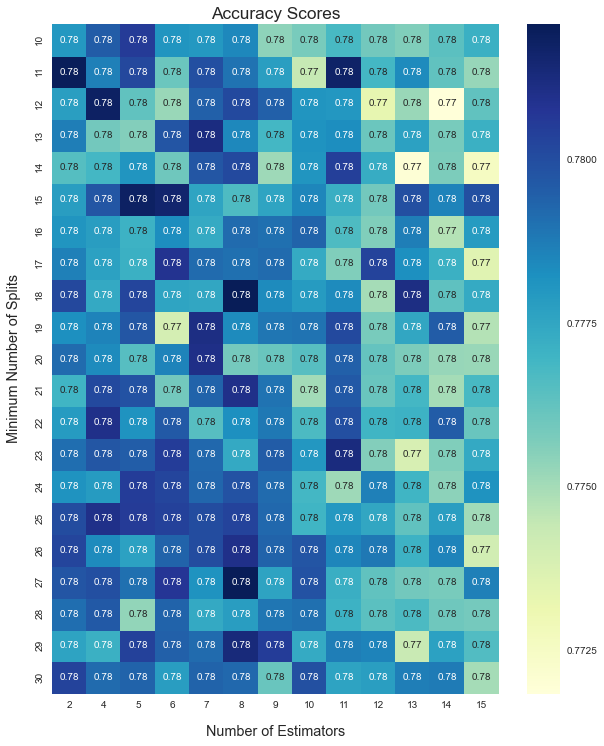

In [18]:
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt

df_accuracy = df_accuracy[df_accuracy.columns].astype(float)

fig, ax = plt.subplots(figsize=(10,12))

#RdBu_r
ax = sns.heatmap(df_accuracy, cmap="YlGnBu",xticklabels=True,\
                 yticklabels=True,annot=True, ax=ax)
ax.set_title("Accuracy Scores", size='xx-large')
ax.set_xlabel('Number of Estimators', size='x-large', labelpad=15)
ax.set_ylabel('Minimum Number of Splits', size='x-large',labelpad=15)



In [ ]:
print df_precision.head()

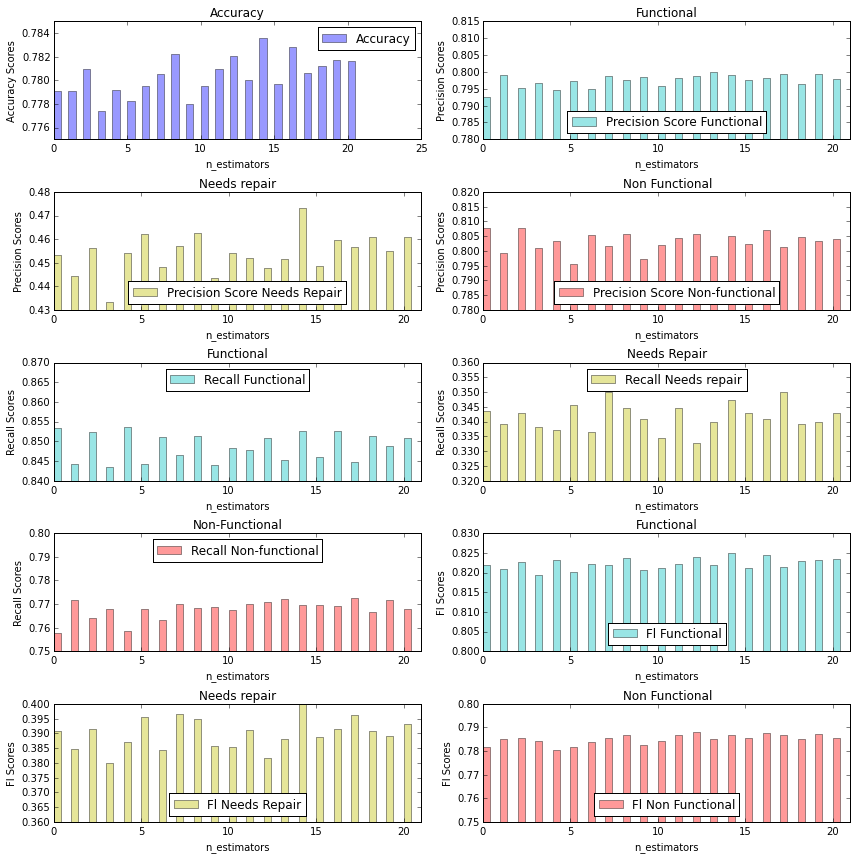

In [147]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2,figsize=(12,12))

n_groups = 21
bar_width = 0.50
index = np.arange(n_groups)
opacity = 0.4

rects1 = ax1.bar(index, acc_score, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Accuracy')

ax1.set_ylim([0.775,0.785])
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Accuracy Scores')

ax1.set_title('Accuracy')
ax1.legend()


bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.4

x1 = []
x2 = []
x3 = []

for element in range(len(prec_score)):
    x1.append(prec_score[element][0])
    x2.append(prec_score[element][1])
    x3.append(prec_score[element][2])

rects1 = ax2.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Precision Score Functional')

rects2 = ax3.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Precision Score Needs Repair')

rects3 = ax4.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Precision Score Non-functional')

ax2.legend(loc=8)
ax2.set_ylim([0.78,0.815])
ax2.set_xlim([0,21])
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Precision Scores')
ax2.set_title('Functional')

ax3.legend(loc=8)
ax3.set_ylim([0.43,0.48])
ax3.set_xlim([0,21])
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('Precision Scores')
ax3.set_title('Needs repair')

ax4.legend(loc=8)
ax4.set_ylim([0.78,0.82])
ax4.set_xlim([0,21])
ax4.set_xlabel('n_estimators')
ax4.set_ylabel('Precision Scores')
ax4.set_title('Non Functional')


bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.4

x1 = []
x2 = []
x3 = []

for element in range(len(reca_score)):
    x1.append(reca_score[element][0])
    x2.append(reca_score[element][1])
    x3.append(reca_score[element][2])

rects1 = ax5.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Recall Functional')

rects2 = ax6.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Recall Needs repair')

rects3 = ax7.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Recall Non-functional')

ax5.legend(loc=9)
ax5.set_ylim([0.84,0.87])
ax5.set_xlim([0,21])
ax5.set_xlabel('n_estimators')
ax5.set_ylabel('Recall Scores')
ax5.set_title('Functional')

ax6.legend(loc=9)
ax6.set_ylim([0.32,0.36])
ax6.set_xlim([0,21])
ax6.set_xlabel('n_estimators')
ax6.set_ylabel('Recall Scores')
ax6.set_title('Needs Repair')

ax7.legend(loc=9)
ax7.set_ylim([0.75,0.80])
ax7.set_xlim([0,21])
ax7.set_xlabel('n_estimators')
ax7.set_ylabel('Recall Scores')
ax7.set_title('Non-Functional')

x1 = []
x2 = []
x3 = []

for element in range(len(fll_score)):
    x1.append(fll_score[element][0])
    x2.append(fll_score[element][1])
    x3.append(fll_score[element][2])

rects1 = ax8.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Fl Functional')

rects2 = ax9.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Fl Needs Repair')

rects3 = ax10.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Fl Non Functional')

ax8.legend(loc=8)
ax8.set_ylim([0.8,0.83])
ax8.set_xlim([0,21])
ax8.set_xlabel('n_estimators')
ax8.set_ylabel('Fl Scores')
ax8.set_title('Functional')

ax9.legend(loc=8)
ax9.set_ylim([0.36,0.40])
ax9.set_xlim([0,21])
ax9.set_xlabel('n_estimators')
ax9.set_ylabel('Fl Scores')
ax9.set_title('Needs repair')

ax10.legend(loc=8)
ax10.set_ylim([0.75,0.80])
ax10.set_xlim([0,21])
ax10.set_xlabel('n_estimators')
ax10.set_ylabel('Fl Scores')
ax10.set_title('Non Functional')


plt.tight_layout()
plt.show()




In [45]:
import numpy as np

'''
n_estimators increase start with 20, default is 10

'''
num_estimators = [10,11,12,13,14,15,16,17,18,19,20]
train_res = []
test_res
for estim in num_estimators:
    clf = ExtraTreesClassifier(num_estimators=estim)
    X_new_t = clf.fit_transform(X, y)
    result_train = clf.score(X,y)
    result_test = clf.score(X_pumps_test,y_pumps_test)
    print "Number of Estimators: ",estim
    print "Train Score:",result_train
    print "Test Score:",result_test
    

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]],X.columns.values[indices[f]]))

print "X_new_t",len(X_new_t)

print X_new_t.shape


(44550, 14)
Train Score: 0.995061728395
Test Score: 0.779057239057
Feature ranking:
1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh
15. feature 25 (0.010126) VWC
16. feature 31 (0.009989) True
17. feature 30 (0.009214) False
18. feature 17 (0.008781) True
19. feature 69 (0.008713) unknown
20. feature 63 (0.007745) unknown
21. feature 86 (0.007675) communal standpipe
22. feature 66 (0.007240) good
23. feature 56 (0.007170) user-group
24. feature 16 (0.007167) False
25. feature 62 (0.007049) per bucket
26. feature 11 (0.006857) Lake Victoria
27. feature 73 (0.006853

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


In [46]:
import matplotlib.pyplot as plt

In [280]:
'''from sklearn.tree import DecisionTreeClassifier
clf2222 = DecisionTreeClassifier()
X_new = clf2222.fit_transform(X, y)
result_train = clf2222.score(X,y)
print result_test

with open("export2.dot","wb") as f:
    f = export_graphviz(clf2222,out_file=f,feature_names=indices)
'''

0.778181818182


In [287]:
'''from sklearn import tree
import StringIO
import pydot
from sklearn.externals.six import StringIO  

clf2222 = DecisionTreeClassifier()
N = clf2222.fit_transform(X,y)

X_333 = X[['latitude','longitude','gps_height','dry','population']]
clf333 = DecisionTreeClassifier()
transform = clf333.fit_transform(X_333,y)

dot_data = StringIO()
tree.export_graphviz(clf333, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("DTF.pdf")'''

True

In [264]:
'''
with open("export1.dot","wb") as f:
    f = export_graphviz(clf,out_file=f,feature_names=indices)
'''    

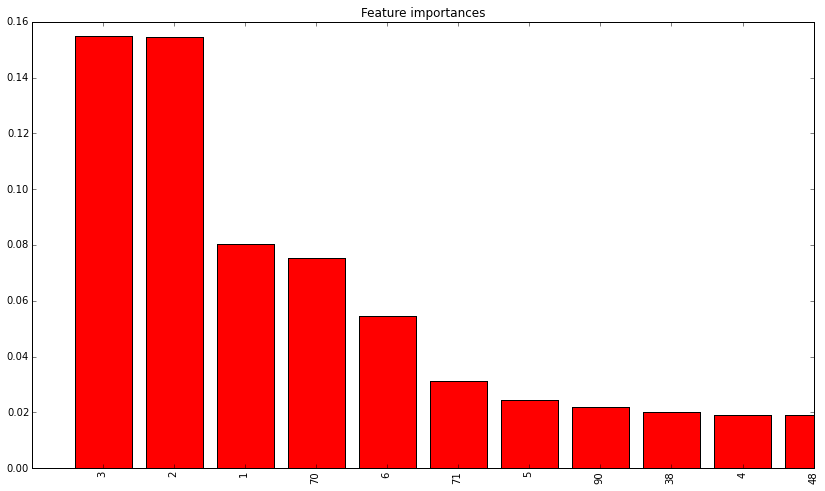

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'region_code'
 'district_code' 'population' 'Internal' 'Lake Nyasa' 'Lake Rukwa'
 'Lake Tanganyika' 'Lake Victoria' 'Pangani' 'Rufiji'
 'Ruvuma / Southern Coast' 'Wami / Ruvu' 'False' 'True' 'Company' 'None'
 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust' 'VWC' 'WUA' 'WUG'
 'Water Board' 'Water authority' False True 'afridev' 'gravity'
 'india mark ii' 'india mark iii' 'mono' 'nira/tanira' 'other'
 'other handpump' 'other motorpump' 'rope pump' 'submersible' 'swn 80'
 'wind-powered' 'gravity' 'handpump' 'motorpump' 'other' 'rope pump'
 'submersible' 'wind-powered' 'commercial' 'other' 'parastatal' 'unknown'
 'user-group' 'annually' 'monthly' 'never pay' 'on failure' 'other'
 'per bucket' 'unknown' 'colored' 'fluoride' 'good' 'milky' 'salty'
 'unknown' 'dry' 'enough' 'insufficient' 'seasonal' 'unknown' 'borehole'
 'dam' 'other' 'rainwater harvesting' 'river/lake' 'shallow well' 'spring'
 'groundwater' 'surface' 'unknown' 'cattle t

In [47]:
# Plot the feature importances of the forest

plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), indices, rotation='vertical')
plt.xlim([-1, 10])
plt.show()

print X.columns.values
for a in range(len(X.columns.values)):
    print a," - ", X.columns.values[indices[a]]





In [224]:
'''X_2 = X[['latitude','longitude','gps_height','dry','population']]

print X_2.head()'''

        latitude  longitude  gps_height  dry  population
37900  -4.053327  33.104711           0    0           0
40527  -8.954532  32.569985           0    0           0
26058  -8.439998  31.736616        1804    0         200
6969   -9.123071  34.774402        1821    0         108
41018 -10.923966  36.092962         767    0         400


In [54]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv', index_col='id')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
            'population','basin','public_meeting','scheme_management','permit',\
            'extraction_type_group','extraction_type_class','management_group',\
            'payment_type','quality_group','quantity_group',\
            'source_type','source_class','waterpoint_type_group']]

print test.head()

       amount_tsh date_recorded                  funder  gps_height  \
id                                                                    
50785           0    2013-02-04                    Dmdd        1996   
51630           0    2013-02-04  Government Of Tanzania        1569   
17168           0    2013-02-01                     NaN        1567   
45559           0    2013-01-22              Finn Water         267   
49871         500    2013-03-27                  Bruder        1260   

        installer  longitude   latitude                 wpt_name  num_private  \
id                                                                              
50785        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
51630         DWE  36.656709  -3.309214                  Kimnyak            0   
17168         NaN  34.767863  -5.004344           Puma Secondary            0   
45559  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
49871      BRUDE

KeyError: "['id'] not in index"

In [55]:
tf_data_basin = pd.get_dummies(test['basin'])
print 'basin:',tf_data_basin.shape
tf_data_public_meeting = pd.get_dummies(test['public_meeting'])
print 'Public Meeting:',tf_data_public_meeting.shape
tf_data_scheme_mgmnt = pd.get_dummies(test['scheme_management'])
print 'Scheme Management:',tf_data_scheme_mgmnt.shape
tf_data_permit = pd.get_dummies(test['permit'])
print 'permit:',tf_data_permit.shape
tf_data_extraction_type_group = pd.get_dummies(test['extraction_type_group'])
print 'Data Extraction:',tf_data_extraction_type_group.shape
tf_data_extraction_type_class = pd.get_dummies(test['extraction_type_class'])
print 'Data Extr Type:',tf_data_extraction_type_class.shape
tf_data_management_group = pd.get_dummies(test['management_group'])
print 'Management Group:',tf_data_management_group.shape
tf_data_payment_type = pd.get_dummies(test['payment_type'])
print 'Payment Type:',tf_data_payment_type.shape
tf_data_quality_group = pd.get_dummies(test['quality_group'])
print 'Quality Group:',tf_data_quality_group.shape
tf_data_quantity_group = pd.get_dummies(test['quantity_group'])
print 'Quantity Group:',tf_data_quantity_group.shape
tf_data_source_type = pd.get_dummies(test['source_type'])
print 'Source Type:',tf_data_source_type.shape
tf_data_source_class = pd.get_dummies(test['source_class'])
print 'Source Class:',tf_data_source_class.shape
tf_data_waterpoint_type_group = pd.get_dummies(test['waterpoint_type_group'])
print 'Waterpoint Type:',tf_data_waterpoint_type_group.shape

basin: (14850, 9)
Public Meeting: (14850, 2)
Scheme Management: (14850, 11)
permit: (14850, 2)
Data Extraction: (14850, 13)
Data Extr Type: (14850, 7)
Management Group: (14850, 5)
Payment Type: (14850, 7)
Quality Group: (14850, 6)
Quantity Group: (14850, 5)
Source Type: (14850, 7)
Source Class: (14850, 3)
Waterpoint Type: (14850, 6)


In [56]:
tf_data = test[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]

tf_coded = pd.concat([tf_data,tf_data_basin,tf_data_public_meeting,tf_data_scheme_mgmnt,tf_data_permit,\
                      tf_data_extraction_type_group,tf_data_extraction_type_class,tf_data_management_group,\
                      tf_data_payment_type,tf_data_quality_group,tf_data_quantity_group,\
                      tf_data_source_type,tf_data_source_class,tf_data_waterpoint_type_group],axis=1)

print tf_data.shape
print tf_coded.shape
print type(tf_coded)

(14850, 7)
(14850, 90)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

In [58]:
print tf_coded.tail()
print test.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
id                                                                 
39307           0          34  38.852669  -6.582841            6   
18990        1000           0  37.451633  -5.350428            4   
28749           0        1476  34.739804  -4.585587           13   
33492           0         998  35.432732 -10.584159           10   
68707           0         481  34.765054 -11.226012           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
id                                                                  ...     
39307              1          20         0           0           0  ...     
18990              7        2960         0           0           0  ...     
28749              2         200         1           0           0  ...     
33492              2         150         0           1           0  ...     
68707              3          40         0           1       

In [59]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

tf_coded_2 = tf_coded[['latitude','longitude','gps_height','dry','population','enough','district_code',\
                       'region_code','never pay','insufficient']]

print tf_coded_2.head()
print tf_coded_2.tail()


        latitude  longitude  gps_height  dry  population  enough  \
id                                                                 
50785  -4.059696  35.290799        1996    0         321       0   
51630  -3.309214  36.656709        1569    0         300       0   
17168  -5.004344  34.767863        1567    0         500       0   
45559  -9.418672  38.058046         267    1         250       0   
49871 -10.950412  35.006123        1260    0          60       1   

       district_code  region_code  never pay  insufficient  
id                                                          
50785              3           21          1             0  
51630              2            2          1             1  
17168              2           13          1             1  
45559             43           80          0             0  
49871              3           10          0             0  
        latitude  longitude  gps_height  dry  population  enough  \
id                          

In [70]:
X_transformed = X_pumps_train[['latitude','longitude','gps_height','dry','population','enough','district_code',\
                       'region_code','never pay','insufficient']]

y = y_pumps_train[['label']]

clf_transformed = ExtraTreesClassifier()
X_fit_n = clf_transformed.fit(X_transformed, y)
result_transformed = clf_transformed.score(X_transformed,y)

print tf_coded_2.head()
print tf_coded_2.tail()
a = clf_transformed.predict(tf_coded_2)

print a


        latitude  longitude  gps_height  dry  population  enough  \
id                                                                 
50785  -4.059696  35.290799        1996    0         321       0   
51630  -3.309214  36.656709        1569    0         300       0   
17168  -5.004344  34.767863        1567    0         500       0   
45559  -9.418672  38.058046         267    1         250       0   
49871 -10.950412  35.006123        1260    0          60       1   

       district_code  region_code  never pay  insufficient  
id                                                          
50785              3           21          1             0  
51630              2            2          1             1  
17168              2           13          1             1  
45559             43           80          0             0  
49871              3           10          0             0  
        latitude  longitude  gps_height  dry  population  enough  \
id                          

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [71]:
print a

['functional' 'functional' 'functional' ..., 'functional' 'functional'
 'non functional']


In [74]:
pred = a

to_submit = []
print len(tf_coded_2)
for ind in range(len(tf_coded_2)):
    ids = tf_coded_2.index[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_7.csv', sep=',', index=False)


14850
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
          id    status_group
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional


In [75]:
print df_submit['status_group'].unique()

['functional' 'non functional' 'functional needs repair']
